## Regressão

O objetivo deste exercício é introduzir e praticar conceitos de Regressão. Para isso utilizaremos 2 bases: <i>Advertising.csv</i> e <i>Portland_housePrices.csv</i>

In [178]:
import pandas as pd
import numpy as np

dados_adv = pd.read_csv('dataset/Advertising.csv', index_col=0)
dados_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


<i>Advertising</i> é um conjunto de dados relacionando o montante de vendas (<i>sales</i>) com o montante investido em marketing em diferentes médias (<i>TV</i>,<i>radio</i> e <i>newspaper</i>).

Por sua vez, <i>Portland_housePrices</i> relaciona o preço de casas com seu tamanho e número de quartos.



In [179]:
dados_por = pd.read_csv('dataset/Portland_housePrices.csv', index_col=None)
dados_por.head()

,tamanho,quartos,preco
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


## Como treinar e usar modelos?
Para virtualmente qualquer tipo de algoritmo de Regressão, existirá uma função <i>fit</i> para treinar o modelo.

Por exemplo, para a regressão linear:

```python
 reg = LinearRegression().fit(X,y)
``` 

Onde <i> X </i> se refere aos atributos de treinamento e <i>y</i> à variável resposta.


In [180]:
from sklearn.linear_model import LinearRegression
#Treina modelo utilizando dados de tamanho para prever preco
X = dados_por.loc[:,['tamanho']]
y = dados_por.loc[:,['preco']]

reg = LinearRegression().fit(X,y)
reg

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Após treinado, o modelo pode ser utilizado para fazer predições (prever <i>y</i> para novos exemplos), através da função <i>predict</i>

In [181]:
y_hat = reg.predict(X)
y_hat

array([[354311.69781212],
       [286510.95280112],
       [394131.18297731],
       [261758.29986059],
       [474846.35560945],
       [338303.18857341],
       [277632.28381158],
       [263238.07802551],
       [256915.38950266],
       [272251.27230277],
       [332249.550626  ],
       [340321.06788921],
       [325523.28623999],
       [673674.73085997],
       [241848.557278  ],
       [380678.65420528],
       [248843.87223945],
       [237543.74807095],
       [422246.96811084],
       [479016.63952878],
       [308976.6758504 ],
       [325254.23566454],
       [287049.053952  ],
       [335209.10695584],
       [594573.86168047],
       [219248.30894099],
       [267408.36194484],
       [411081.36923006],
       [367226.12543326],
       [426013.67616701],
       [318662.49656625],
       [205795.78016897],
       [345702.07939802],
       [493276.32002713],
       [314895.78851009],
       [264583.33090272],
       [237947.32393411],
       [358078.40586828],
       [6382

## Regressão Linear Univariada

O framework disponibiliza uma classe <a href="https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html">LinearRegression</a> que implementa regressão linear com o método de mínimos quadrados:

```python
linear_model = LinearRegression()
linear_model.fit(X,y)
linear_model.predict(X)

```
## Avaliando Modelos

Existem algumas formas de inspecionar ou avaliar o modelo aprendido. A primeira forma é visualizar o modelo em um gráfico.



Text(0, 0.5, 'Preço')

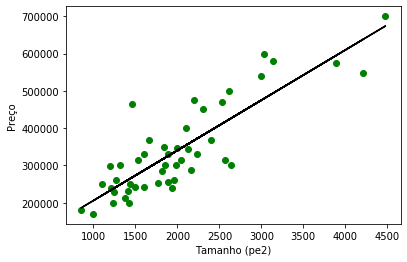

In [182]:
from matplotlib import pyplot as plt

plt.scatter(X, y,color='g')
plt.plot(X, y_hat,color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [190]:
dados_adv['dummy'] = 1
dados_adv['TV2'] = dados_adv.TV ** 2

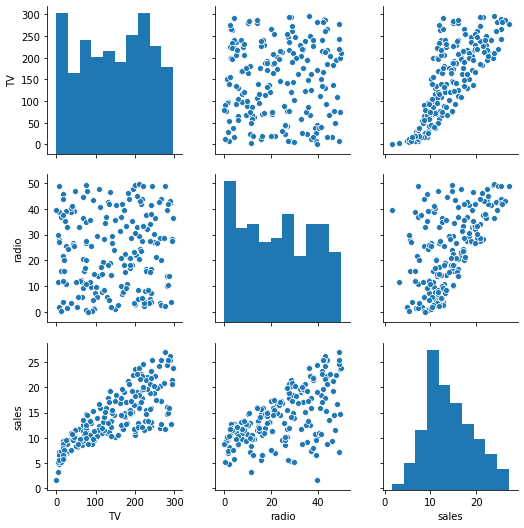

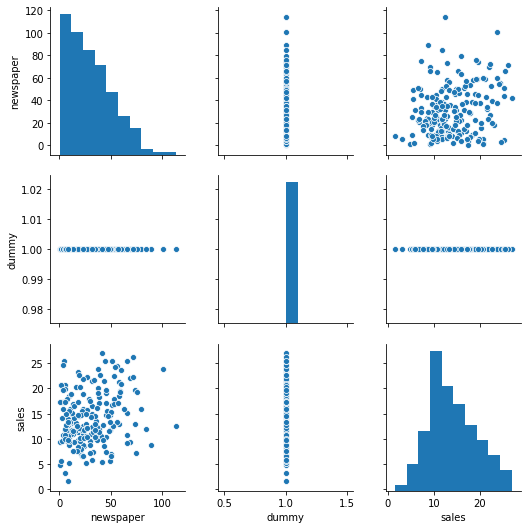

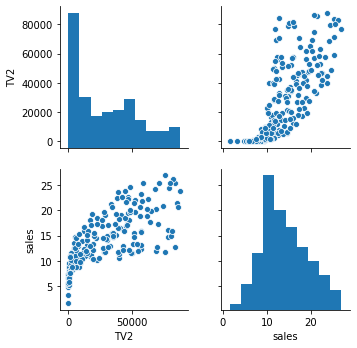

In [191]:
import seaborn as sns

dados_adv.columns
y_col = ['sales']

x_cols = [col for col in dados_adv.columns if col not in y_col]

n = 2

for i in range(len(x_cols)//n + 1):
    aux = x_cols[i*n:i*n+n]
    sns.pairplot(dados_adv[aux+y_col])
    plt.show()

***********************************************
Número de observações:  47
RSS: 193464477600.71
R2: 0.63
***********************************************



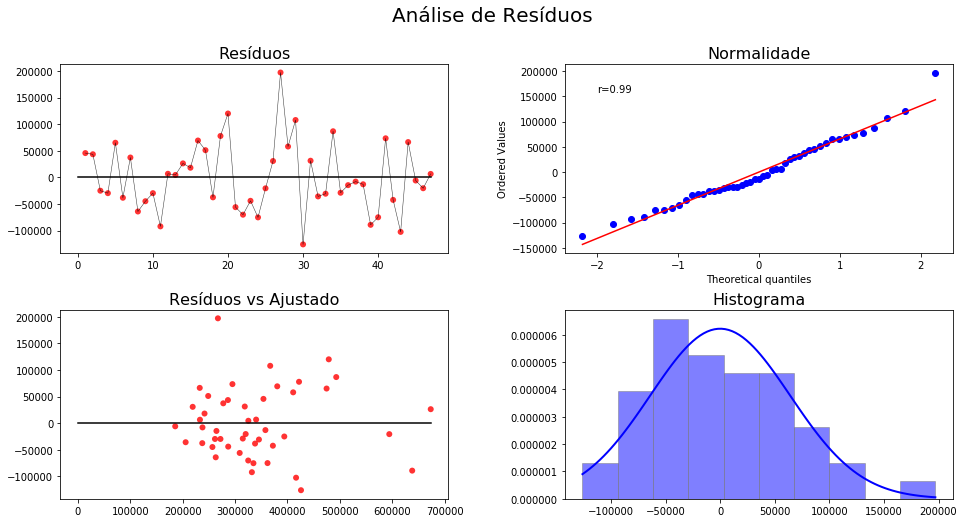

In [17]:
import analise_residuos as ar
import importlib
importlib.reload(ar)

ar.analise_residuos(y, y_hat, graph=True)

Quando há mais de um atributo preditor, visualizar o modelo torna-se difícil, mas ainda é possível avaliar o modelo através do <b>erro quadrático (RSS)</b> ou a métrica <a href="https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html"><b>R^2</b></a>

In [15]:
from sklearn.metrics import r2_score
def calc_rss(y, predicted):
    return float(((predicted - y) ** 2).sum())
    
def calc_r2(y,predicted):
    return r2_score(predicted, y)

In [16]:
rss = calc_rss(y, reg.predict(X))
r2 = calc_r2(y, reg.predict(X))
print(rss)
print(r2)

193464477600.7059
0.6320180251851149


# Exercício 1
Treine modelos lineares na base <i>Portland_housePrices.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com <i>tamanho</i> ou com <i>número de quartos</i>?

2) O RSS e R^2 corroboram suas impressões observando o modelo?




In [18]:
dados_por.columns

Index(['tamanho', 'quartos', 'preco'], dtype='object')

In [52]:
import analise_residuos as ar
import importlib
importlib.reload(ar)

import analise_exploratoria as ae
import importlib
importlib.reload(ae)

<module 'analise_exploratoria' from 'C:\\Users\\lazaropd\\hub_ia\\ai-residency\\Módulo 2 - Data Analysis\\Curso 4 - Regressão\\analise_exploratoria.py'>

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************


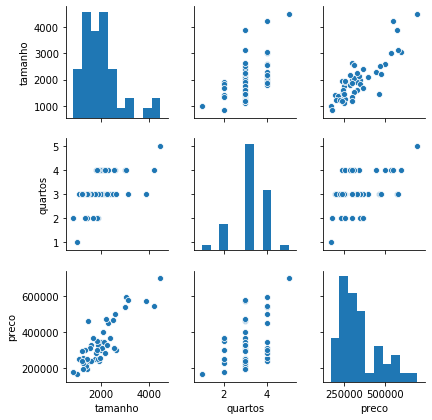

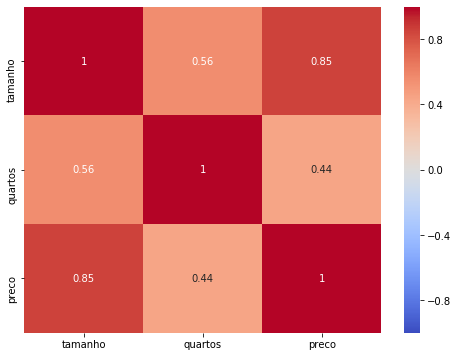

In [41]:
df = dados_por
y_cols = ['preco']
ig_cols = []

ae.analise_exploratoria(df, y_cols, ig_cols, True)

***********************************************
Dados extraídos com sucesso
X:  tamanho
y:  preco
M:  (47, 1) | (47, 1)
***********************************************
***********************************************
Número de observações:  47
RSS: 193464477600.71
R2: 0.63
***********************************************



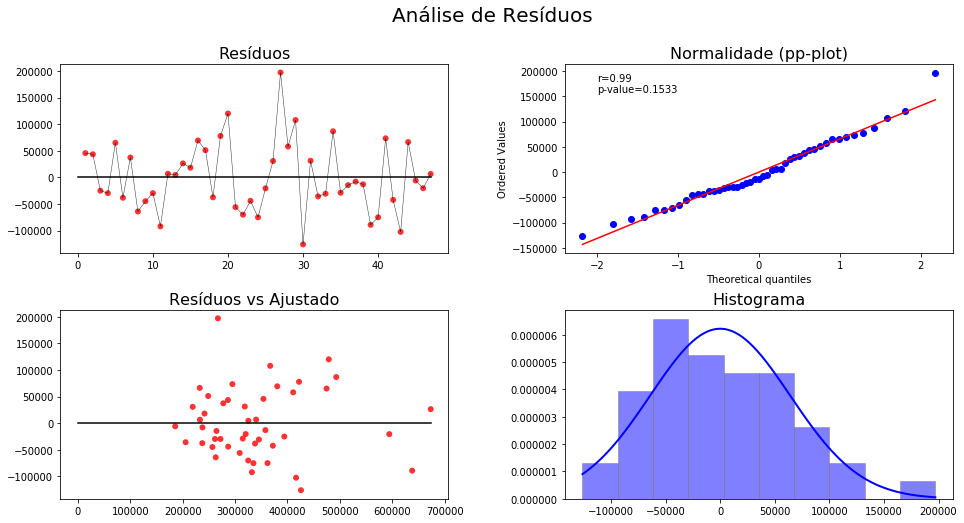

In [54]:
# preço possui correlação mais forte com o preço, além de ser contínua, vamos selecionar esta

df = dados_por
y_cols = ['preco']
ig_cols = ['quartos']

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

model = LinearRegression().fit(X, y)
y_hat = model.predict(X)

ar.analise_residuos(y, y_hat, True)

***********************************************
Dados extraídos com sucesso
X:  quartos
y:  preco
M:  (47, 1) | (47, 1)
***********************************************
***********************************************
Número de observações:  47
RSS: 578535325112.52
R2: -3.11
***********************************************



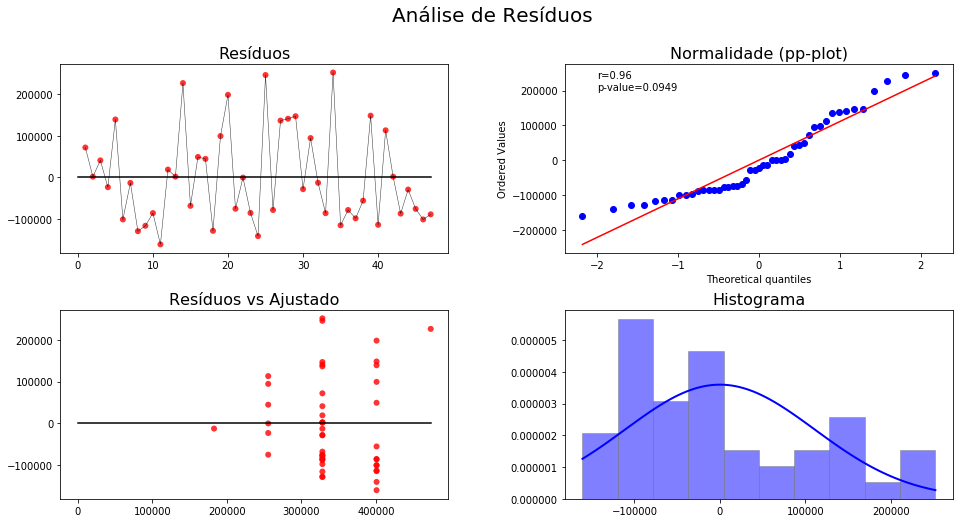

In [53]:
df = dados_por
y_cols = ['preco']
ig_cols = ['tamanho']

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

model = LinearRegression().fit(X, y)
y_hat = model.predict(X)

ar.analise_residuos(y, y_hat, True)

In [ ]:
# observamos um desempenho melhor quando utilizamos o tamanho, isso pode ser visto em todos os indicadores: RSS, R2 e p-value

# Exercício 2

Treine modelos lineares na base <i>Advertising.csv</i> utilizando apenas um dos atributos preditores.

1) Observando visualmente o modelo, qual atributo parece mais razoável? o que foi aprendido com TV, radio ou newspaper?

2) Qual dos modelos é melhor? como você chegou a esta conclusão?

In [55]:
dados_adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


***********************************************
Dados extraídos com sucesso
X:  TV | radio | newspaper
y:  sales
M:  (200, 3) | (200, 1)
***********************************************


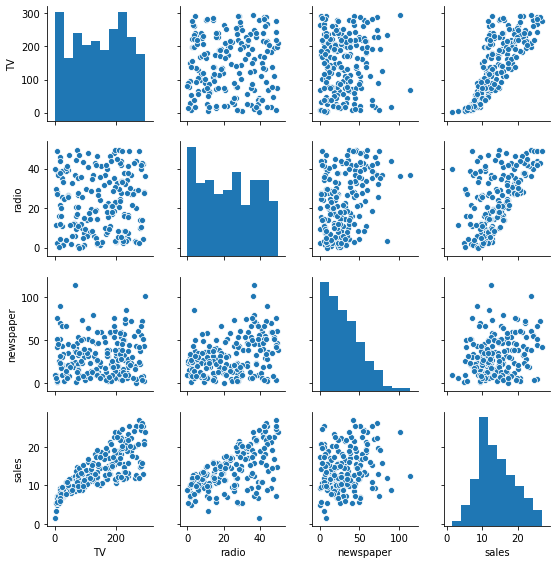

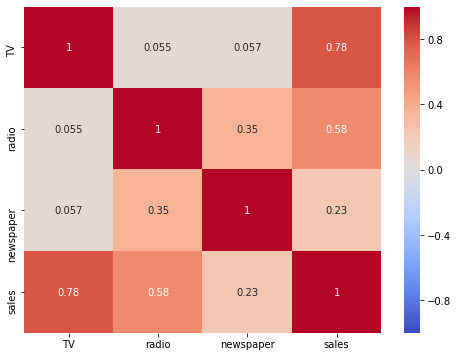

In [135]:
df = dados_adv

y_cols = ['sales']
ig_cols = []

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, True)

***********************************************

X:  TV  |  ['sales']
***********************************************
Número de observações:  200
RSS: 2102.53
R2: 0.37
***********************************************



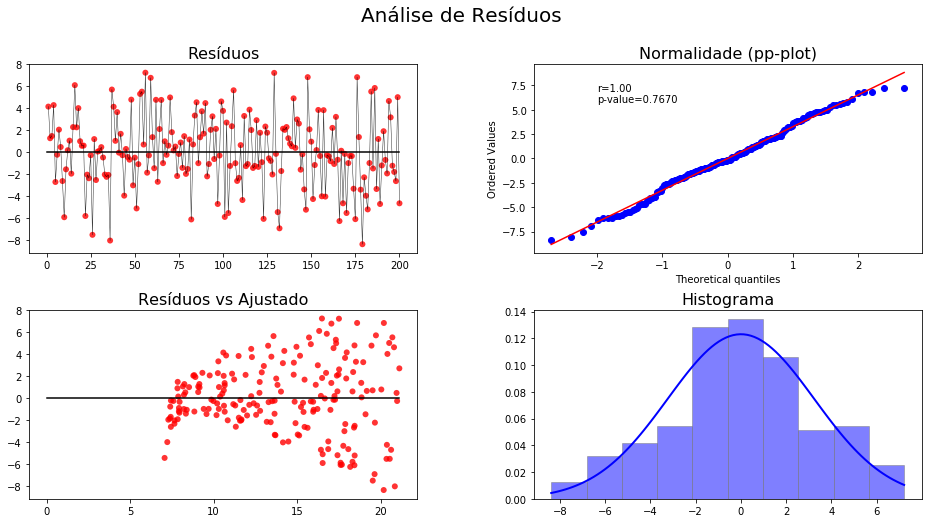

***********************************************

X:  radio  |  ['sales']
***********************************************
Número de observações:  200
RSS: 3618.48
R2: -1.01
***********************************************



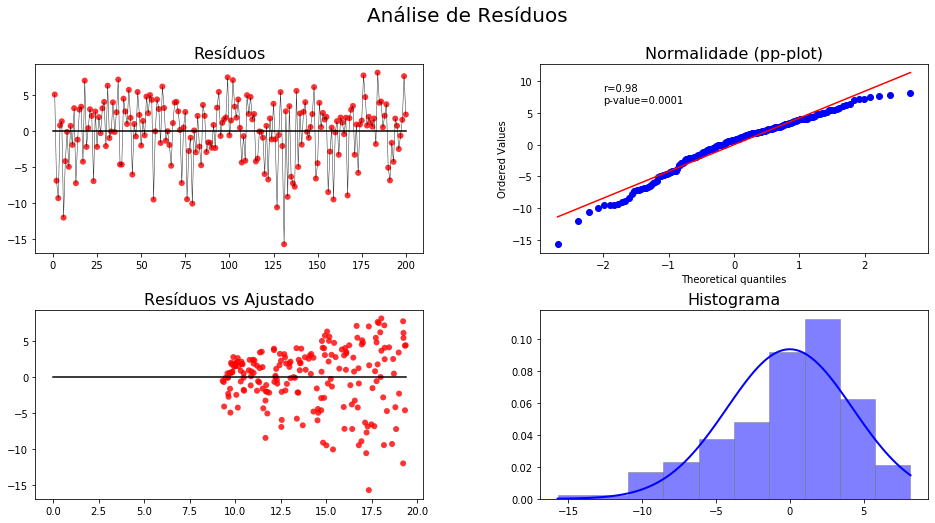

***********************************************

X:  newspaper  |  ['sales']
***********************************************
Número de observações:  200
RSS: 5134.80
R2: -17.19
***********************************************



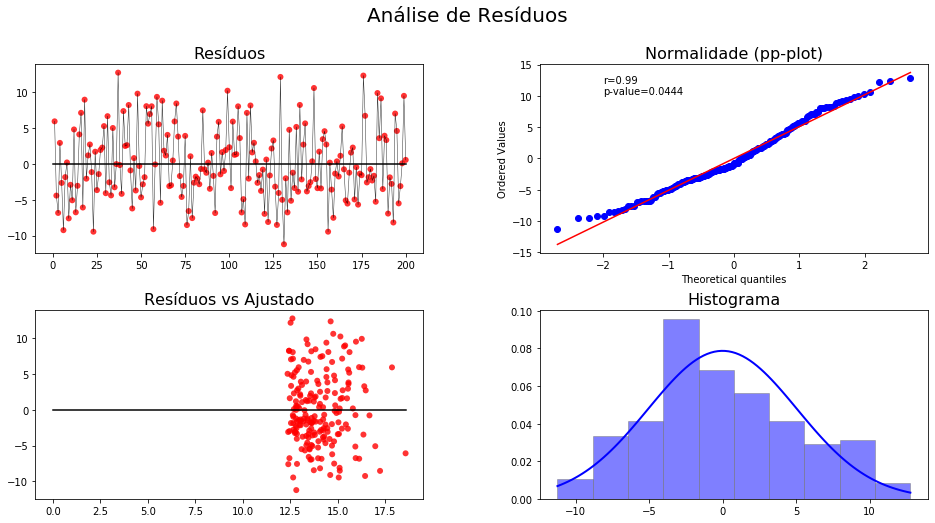

In [139]:
for x_col in X.columns:
    print('***********************************************')
    print('\nX: ', x_col, ' | ', y.columns.values)
    x = X[[x_col]]
    model = LinearRegression().fit(x, y.values)
    y_hat = model.predict(x)
    ar.analise_residuos(y, y_hat, True)

In [58]:
# o melhor modelo foi obtido para TV, com R2 de 0,37
# entretanto, este valor é baixo, e ainda observamos heteroscedasticidade, precisa ser melhorado

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


# Regressão Linear Multivariada
A classe <i>LinearRegression</i> já está implementada de modo a funcionar com múltiplos atributos preditores.

Também é possível utilizar o método de <i>Descida de Gradiente</i> através da classe <a href='https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html'>SGDRegressor</a>:
    


In [140]:
df = dados_por

y_cols = ['preco']
ig_cols = []

X, y, M = ae.analise_exploratoria(df, y_cols, ig_cols, False)

***********************************************
Dados extraídos com sucesso
X:  tamanho | quartos
y:  preco
M:  (47, 2) | (47, 1)
***********************************************


In [141]:
from sklearn.linear_model import SGDRegressor
reg_grad = SGDRegressor(max_iter=5000, alpha=0) #alpha = 0 significa que o modelo nao usa regularização
reg_grad.fit(X, y.values.ravel())
y_hat = reg_grad.predict(X)

Text(0, 0.5, 'Preço')

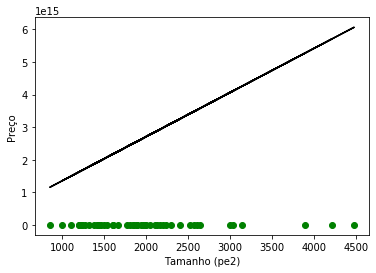

In [142]:
plt.scatter(X.tamanho, y, color='g')
plt.plot(X.tamanho, y_hat, color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

<b>Entretanto</b>... o algoritmo não aprende quando os dados são usados diretamente.

<b>Por quê?</b>

A escala dos dados atrapalha o algoritmo. Tente treinar o regressor linear com descida do gradiente <i>depois de normalizar os dados de entrada</i>.

## Exercício 3

Para cada um dos conjuntos de treinamento, utilize a função <i>fit</i> múltiplas vezes considerando apenas <i>um</i> atributo preditor.

1) O modelo aprendido muda a cada vez que a função <i>fit</i> é utilizada?

2) Os modelos finais aprendidos são os mesmos da outra implementação de regressão linear?


In [167]:
x = X[['tamanho']]

from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(x)
X_scaled = scaler.transform(x)

reg_grad = SGDRegressor(max_iter=3, alpha=0, warm_start=True)
reg_grad.fit(X_scaled, y.values.ravel())
y_hat = reg_grad.predict(X_scaled)

C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


Text(0, 0.5, 'Preço')

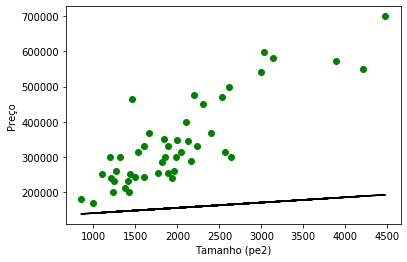

In [168]:
plt.scatter(x, y, color='g')
plt.plot(x, reg_grad.predict(X_scaled), color='k')
plt.xlabel('Tamanho (pe2)')
plt.ylabel('Preço')

In [164]:
import analise_residuos as ar
import importlib
importlib.reload(ar)

import analise_exploratoria as ae
import importlib
importlib.reload(ae)

<module 'analise_exploratoria' from 'C:\\Users\\lazaropd\\hub_ia\\ai-residency\\Módulo 2 - Data Analysis\\Curso 4 - Regressão\\analise_exploratoria.py'>

C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\lazaropd\Anaconda3\envs\PythonGPU\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1188: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to imp

***********************************************
Número de observações:  47
RSS: 1016033311901.23
R2: -57.82
***********************************************

***********************************************
Número de observações:  47
RSS: 637393895740.38
R2: -22.37
***********************************************

***********************************************
Número de observações:  47
RSS: 515921916050.73
R2: -13.53
***********************************************

***********************************************
Número de observações:  47
RSS: 469814162927.92
R2: -10.00
***********************************************

***********************************************
Número de observações:  47
RSS: 449218081895.00
R2: -8.19
***********************************************

***********************************************
Número de observações:  47
RSS: 433965611541.99
R2: -6.87
***********************************************

***********************************************
Número de observa

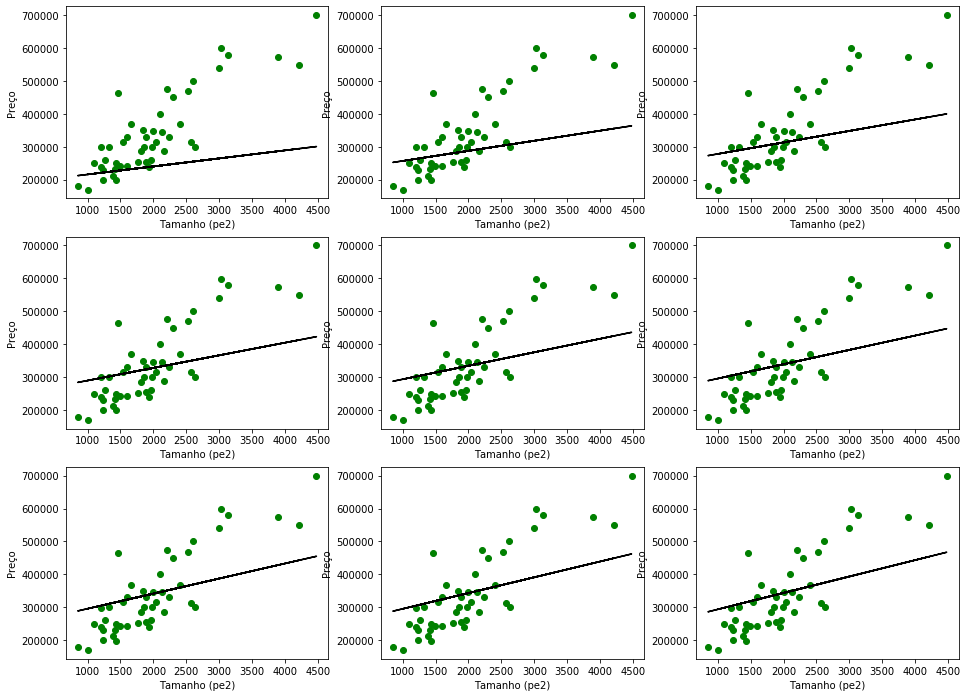

In [169]:
fig, ax = plt.subplots(3, 3, figsize=(16,12))

for i in range(9):
    j, k = i//3, i%3
    reg_grad.fit(X_scaled, y.values.ravel())
    y_hat = reg_grad.predict(X_scaled)
    ax[j][k].scatter(x, y, color='g')
    ax[j][k].plot(x, y_hat, color='k')
    ax[j][k].set_xlabel('Tamanho (pe2)')
    ax[j][k].set_ylabel('Preço')
    ar.analise_residuos(y, y_hat, False)
plt.show()

In [ ]:
# modelos finais mudam a cada vez que a função fit é executada, o SGD continua melhorando a cada chamada da fit
# o desempenho foi inferior ao resultado usando o modelo linear

## Exercício 4


Aprenda modelos utilizando todos os atributos de entrada.

1) Baseado no RSS e no R^2, é possível obter um modelo melhor utilizando todos os dados?

2) Existem atributos que poderiam ser desconsiderados sem que fosse afetada a precisão?

3) Qual implementação treina mais rápido? A com método dos mínimos quadrados ou a com descida de gradiente?


In [170]:
from sklearn.linear_model import LinearRegression
X_tv = dados_adv.loc[:,['TV']]
X_ra = dados_adv.loc[:,['radio']]
X_ne = dados_adv.loc[:,['newspaper']]
X_tv_ra = dados_adv.loc[:,['TV','radio']]
X_tv_ne = dados_adv.loc[:,['TV','newspaper']]
X_ra_ne = dados_adv.loc[:,['radio','newspaper']]
X_all = dados_adv.loc[:,['TV','radio','newspaper']]


y_adv = dados_adv.loc[:,['sales']]

lin_reg = LinearRegression().fit(X_tv,y_adv)
r2_tv = calc_r2(y_adv,lin_reg.predict(X_tv))

lin_reg = LinearRegression().fit(X_ra,y_adv)
r2_ra = calc_r2(y_adv,lin_reg.predict(X_ra))

lin_reg = LinearRegression().fit(X_ne,y_adv)
r2_ne = calc_r2(y_adv,lin_reg.predict(X_ne))

lin_reg = LinearRegression().fit(X_tv_ra,y_adv)
r2_tv_ra = calc_r2(y_adv,lin_reg.predict(X_tv_ra))

lin_reg = LinearRegression().fit(X_tv_ne,y_adv)
r2_tv_ne = calc_r2(y_adv,lin_reg.predict(X_tv_ne))

lin_reg = LinearRegression().fit(X_ra_ne,y_adv)
r2_ra_ne = calc_r2(y_adv,lin_reg.predict(X_ra_ne))

lin_reg = LinearRegression().fit(X_all,y_adv)
r2_all = calc_r2(y_adv,lin_reg.predict(X_all))

print("R^2 de acordo com os atributos")
print("TV:         " + str(r2_tv))
print("Radio:      " + str(r2_ra))
print("Newspaper:  " + str(r2_ne))
print("TV + Rad:   " + str(r2_tv_ra))
print("TV + News:  " + str(r2_tv_ne))
print("Rad + News: " + str(r2_ra_ne))
print("Todos:      " + str(r2_all))


R^2 de acordo com os atributos
TV:         0.3656794003764149
Radio:      -1.0117537716572929
Newspaper:  -17.18632873290735
TV + Rad:   0.8854141813245442
TV + News:  0.4516180830032447
Rad + News: -1.0056640179953256
Todos:      0.8854345262449441


In [172]:
import time

repeticoes = 10000

start_time = time.time()
for i in range(repeticoes):
    lin_reg = LinearRegression().fit(X_all, y_adv)
elapsed_time = time.time() - start_time

print("Tempo método mínimos quadrados: " +str(elapsed_time))

scaler = MinMaxScaler()
scaler.fit(X_all)
X_scaled = scaler.transform(X_all)
y_sgd = y_adv.values.ravel()
start_time = time.time()
for i in range(repeticoes):
    lin_reg = SGDRegressor(alpha=0).fit(X_scaled,y_sgd)
elapsed_time = time.time() - start_time

print("Tempo descida do gradiente:     " +str(elapsed_time))

Tempo método mínimos quadrados: 13.12962293624878
Tempo descida do gradiente:     28.41904377937317
